In [1]:
# Preprocessing Temporal and Weather Features 
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
#data load
bikesharing = pd.read_csv("./Data/hour.csv")

In [9]:
season_mapping = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
yr_mapping = {0: "2011", 1:"2012"}
mnth_mapping = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
weekday_mapping={0: 'Sunday', 1: 'Monday', 2: 'Tuesday',3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weather_mapping={1:"Clear",2:"Misty",3:"Light Snow/Rain",4:"Heavy Snow/Rain"}


In [10]:
bikesharing['season']=bikesharing['season'].apply(lambda x: season_mapping[x])
bikesharing['yr']=bikesharing['yr'].apply(lambda x: yr_mapping[x])
bikesharing['mnth']=bikesharing['mnth'].apply(lambda x: mnth_mapping[x])
bikesharing['weekday']=bikesharing['weekday'].apply(lambda x: weekday_mapping[x])
bikesharing['weathersit']=bikesharing['weathersit'].apply(lambda x: weather_mapping[x])

#bikesharing.sample(100)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8372,8373,2011-12-20,winter,2011,Dec,12,0,Tuesday,1,Misty,0.44,0.4394,0.54,0.1343,16,159,175
12581,12582,2012-06-13,summer,2012,Jun,10,0,Wednesday,1,Misty,0.64,0.6061,0.65,0.4179,64,134,198
2484,2485,2011-04-18,summer,2011,Apr,10,0,Monday,1,Misty,0.52,0.5000,0.55,0.1045,41,68,109
46,47,2011-01-02,spring,2011,Jan,23,0,Sunday,0,Clear,0.22,0.2273,0.47,0.1642,0,8,8
17200,17201,2012-12-24,spring,2012,Dec,12,0,Monday,1,Misty,0.28,0.3030,0.56,0.0896,22,113,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7276,7277,2011-11-04,winter,2011,Nov,19,0,Friday,1,Clear,0.40,0.4091,0.37,0.3582,14,182,196
1531,1532,2011-03-09,spring,2011,Mar,4,0,Wednesday,1,Clear,0.24,0.2576,0.75,0.1045,0,2,2
2844,2845,2011-05-03,summer,2011,May,10,0,Tuesday,1,Misty,0.64,0.6061,0.69,0.3582,36,91,127
8107,8108,2011-12-09,winter,2011,Dec,11,0,Friday,1,Clear,0.32,0.3030,0.70,0.2537,15,121,136


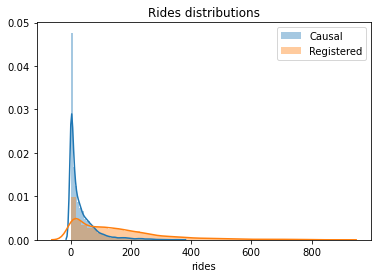

In [13]:
#registered vs casual analysis
#plotting distributions 
sns.distplot(bikesharing['casual'],label="Causal")
sns.distplot(bikesharing['registered'],label="Registered")
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")
plt.savefig('figs/rides_distributions.png', format='png')


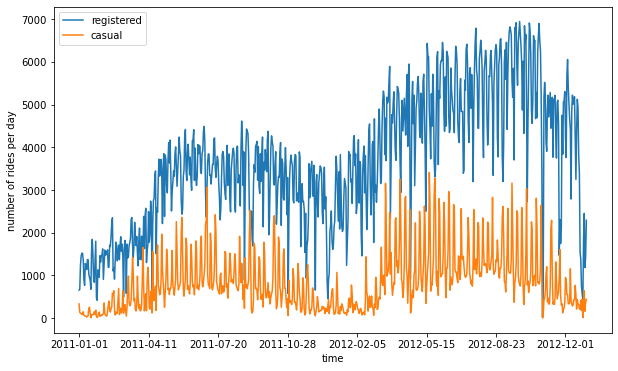

In [26]:
# plot evolution of rides over time
plot_data=bikesharing[['dteday','registered','casual']]
ax=plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time")
ax.set_ylabel("number of rides per day")
plt.savefig('figs/rides_daily.png', format='png')

,registered,casual
dteday,,
2011-01-01,654,331
2011-01-02,670,131
2011-01-03,1229,120
2011-01-04,1454,108
2011-01-05,1518,82
...,...,...
2012-12-27,1867,247
2012-12-28,2451,644
2012-12-29,1182,159
